In [1]:
%%time

# This script was used to generate WordShiftGraphs for all optimized clusters in Sample 1 & 2

# Import required libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import shifterator as sh
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings('ignore')

# Load preprocessed data
df = pd.read_csv("PreProcessedDataNew.csv", usecols=["date","id",'clean_text'])
df.head()

Wall time: 1min 12s


,date,id,clean_text
0,2021-06-30,1073671B,ladakh pitches for a new state bird and animal...
1,2021-06-30,532861A,the world u s temperature is rising and its es...
2,2021-06-30,532866A,u ccouple fined for destroying joshua trees u ...
3,2021-06-30,185146A,young american adults are dying u and not just...
4,2021-06-30,185145A,xb f highest temperature ever recorded above t...



Fig.1 - Plotting Sample 1 Sub - Cluster 0 | Apr-May 2008(L) vs Jun-Aug 2008(R), Sample 1 size: 150000


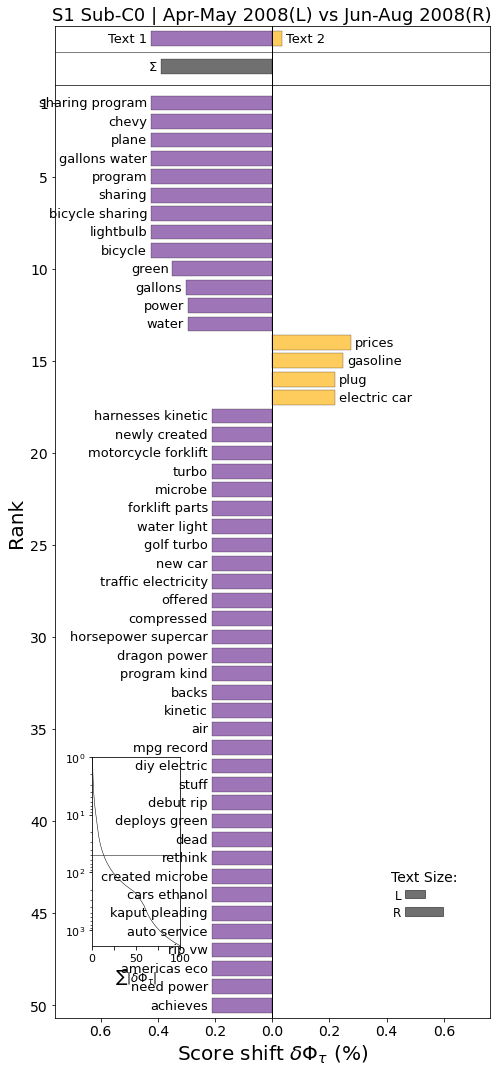


Fig.2 - Plotting Sample 2 Sub - Cluster 2 | Apr-May 2008(L) vs Jun-Aug 2008(R), Sample 2 size: 150000


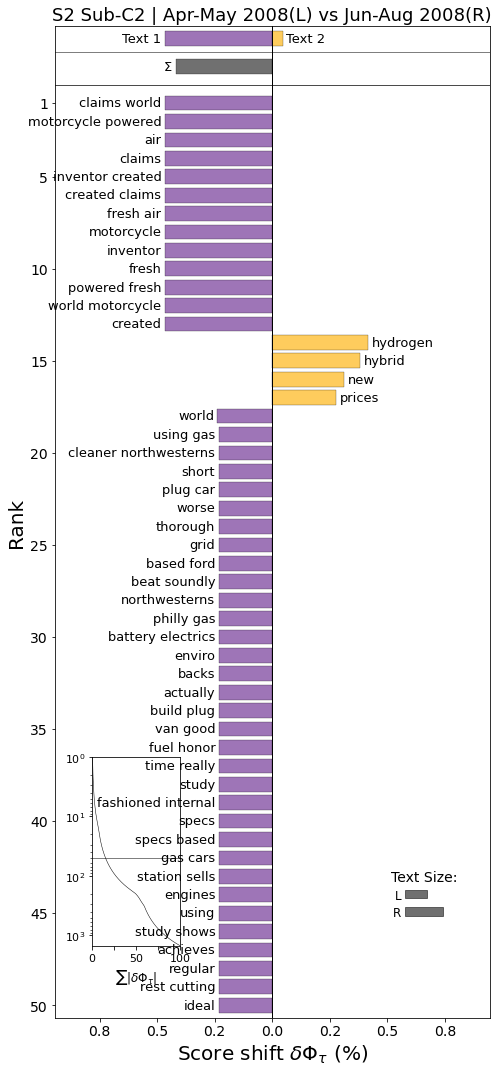


Fig.3 - Plotting Sample 1 Sub - Cluster 0 | Mar-May 2009(L) vs Apr-Jun 2010(R), Sample 1 size: 150000


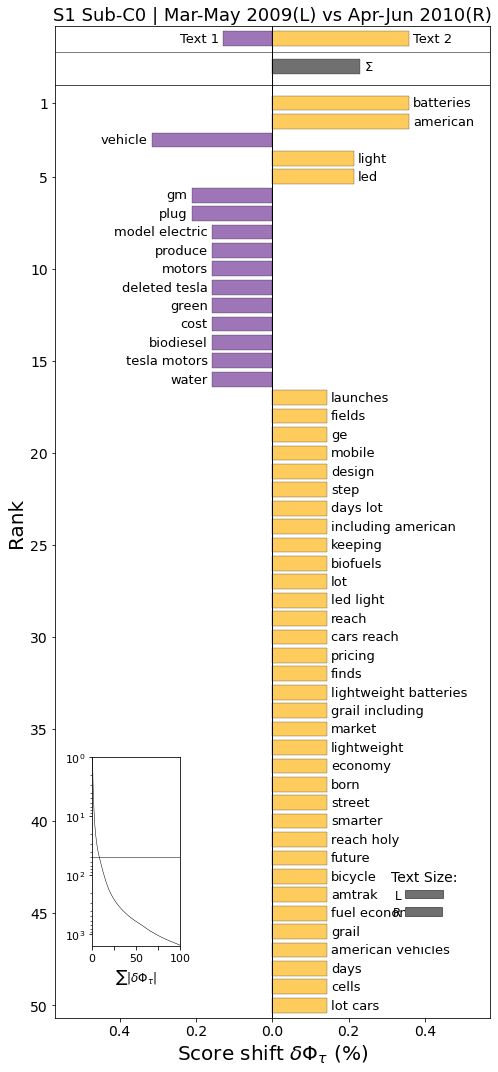


Fig.4 - Plotting Sample 2 Sub - Cluster 2 | Mar-May 2009(L) vs Apr-Jun 2010(R), Sample 2 size: 150000


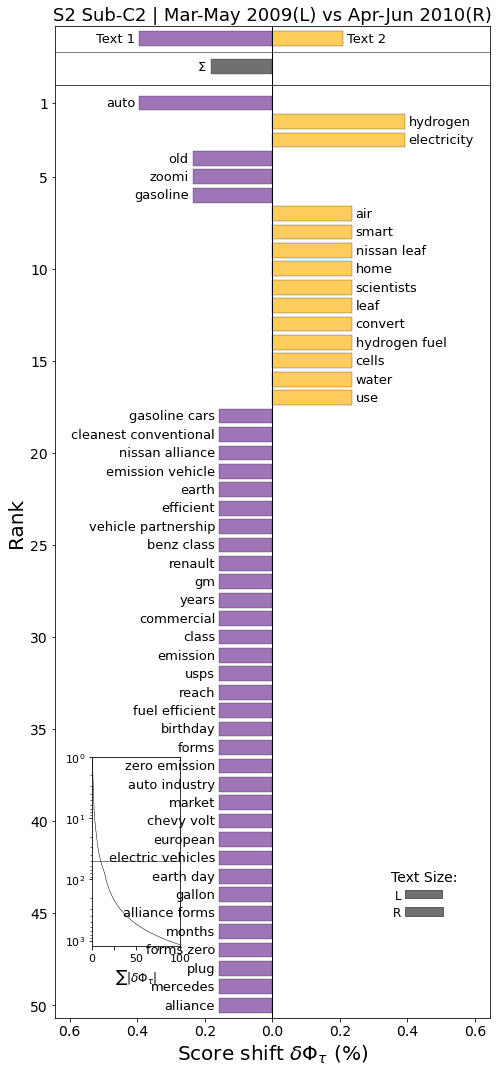


Fig.5 - Plotting Sample 1 Sub - Cluster 0 | Dec-Apr 2017(L) vs Nov-Feb 2020(R), Sample 1 size: 150000


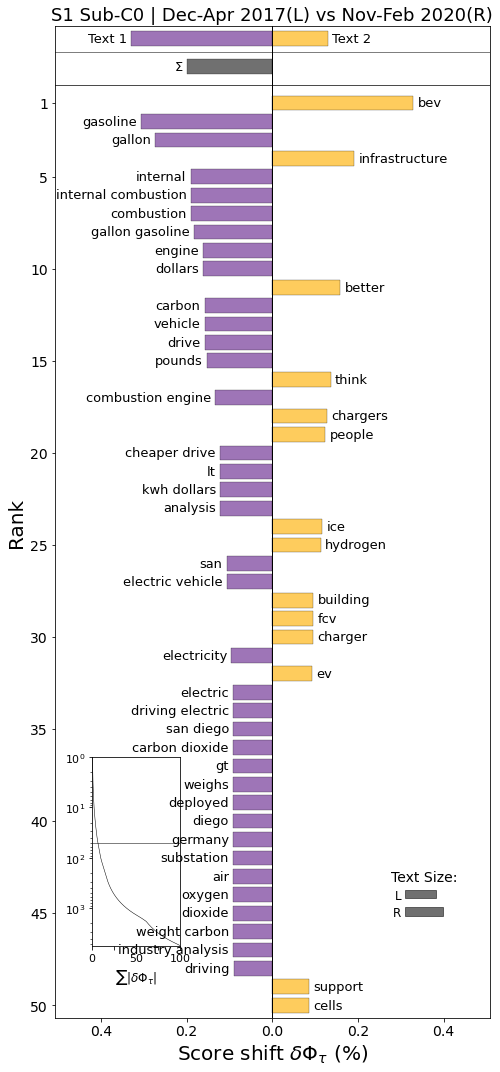


Fig.6 - Plotting Sample 2 Sub - Cluster 2 | Dec-Apr 2017(L) vs Nov-Feb 2020(R), Sample 2 size: 150000


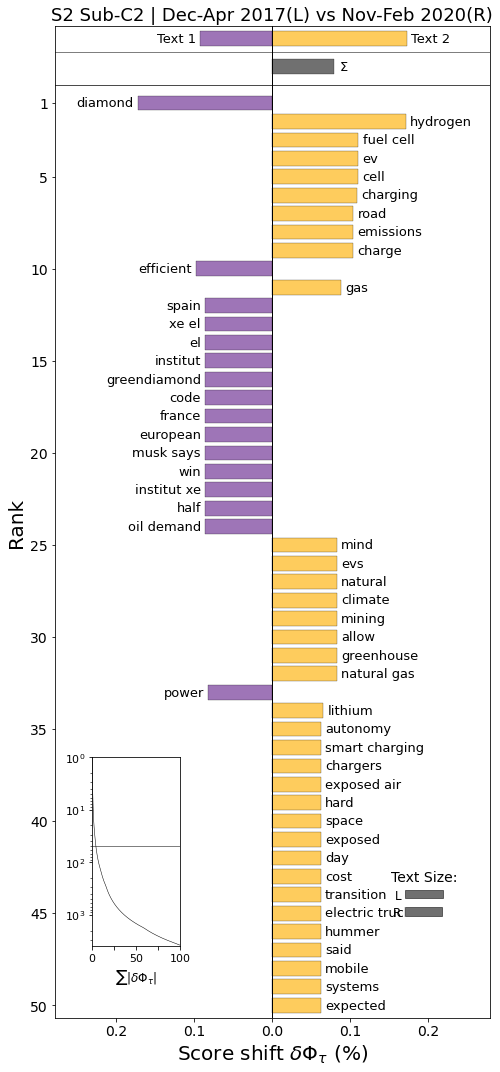


Fig.7 - Plotting Sample 1 Sub - Cluster 10 | Dec-Feb 2009(L) vs Jul-Sep 2009(R), Sample 1 size: 150000


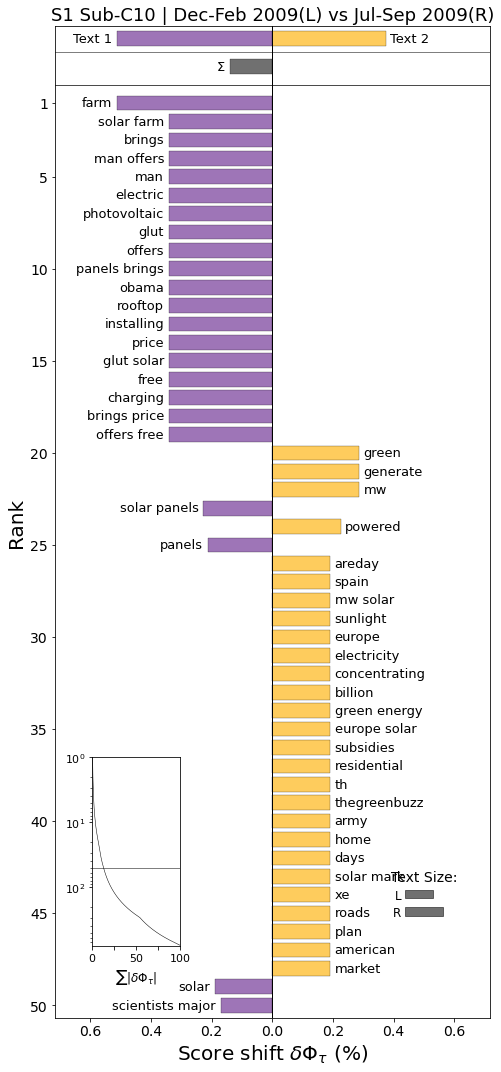


Fig.8 - Plotting Sample 2 Sub - Cluster 11 | Dec-Feb 2009(L) vs Jul-Sep 2009(R), Sample 2 size: 150000


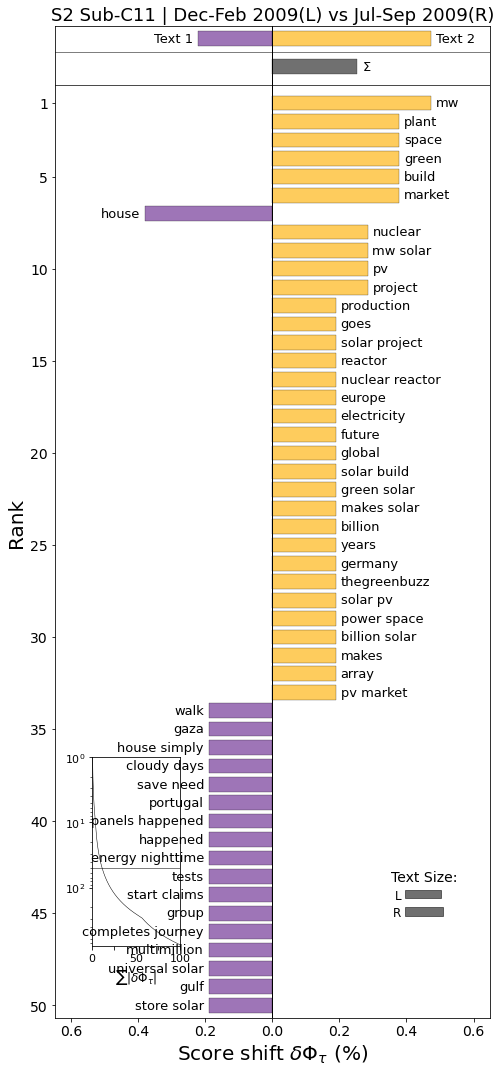


Fig.9 - Plotting Sample 1 Sub - Cluster 10 | Apr-Jun 2010(L) vs Sep-Nov 2010(R), Sample 1 size: 150000


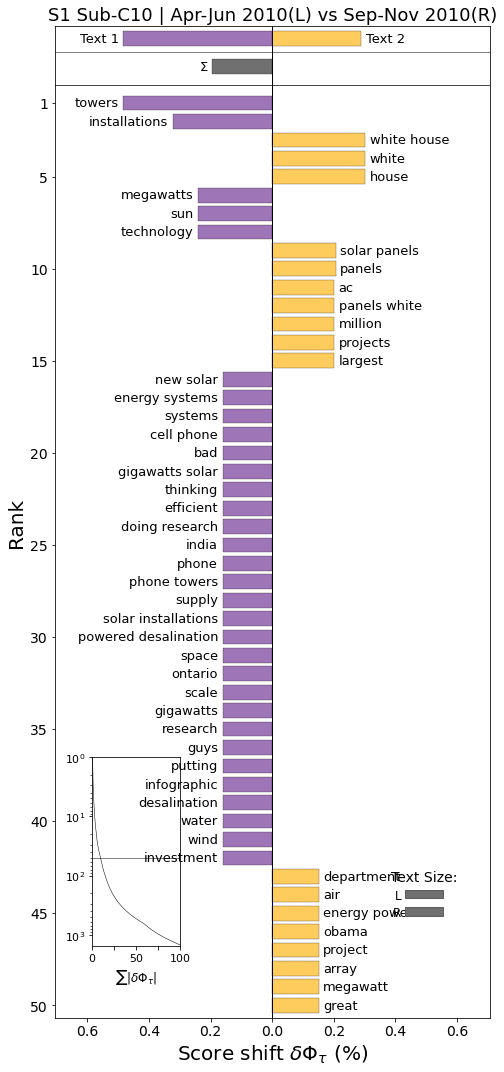


Fig.10 - Plotting Sample 2 Sub - Cluster 11 | Apr-Jun 2010(L) vs Sep-Nov 2010(R), Sample 2 size: 150000


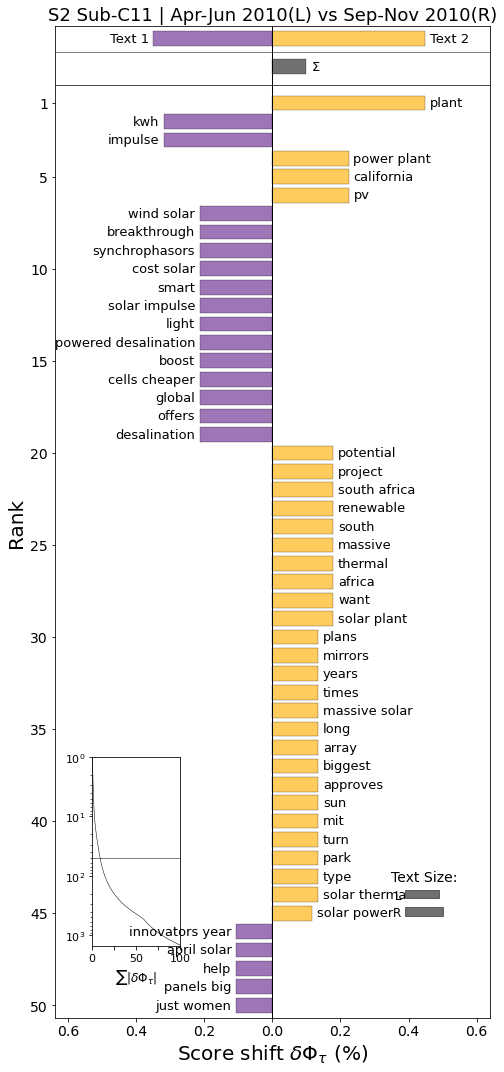


Fig.11 - Plotting Sample 1 Sub - Cluster 10 | Feb-Apr 2011(L) vs Nov-Jan 2012(R), Sample 1 size: 150000


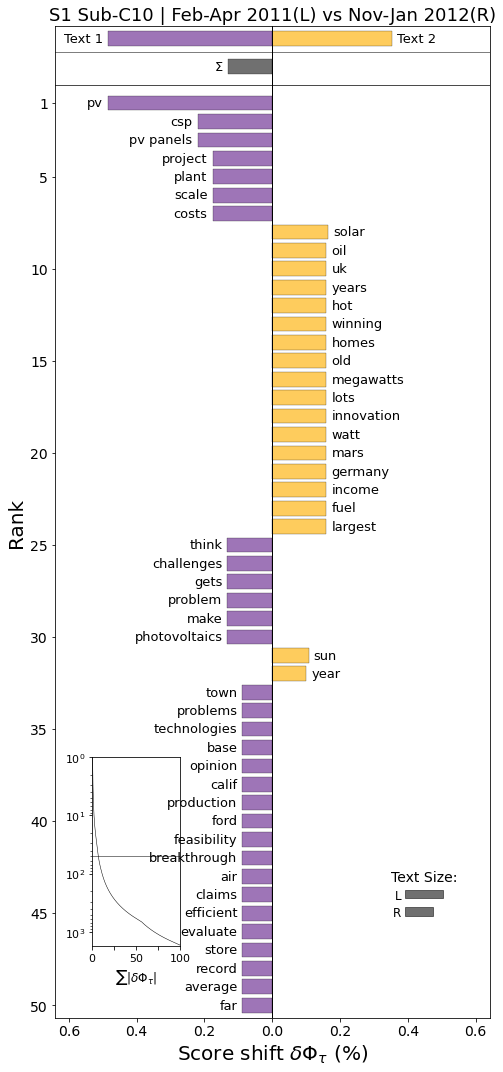


Fig.12 - Plotting Sample 2 Sub - Cluster 11 | Feb-Apr 2011(L) vs Nov-Jan 2012(R), Sample 2 size: 150000


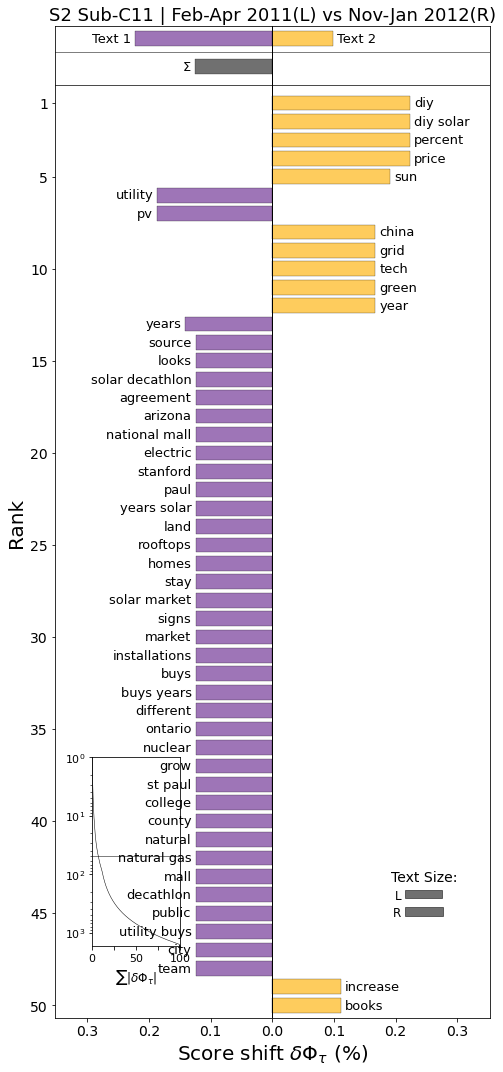


Fig.13 - Plotting Sample 1 Sub - Cluster 10 | Sep-Oct 2013(L) vs Dec-Feb 2015(R), Sample 1 size: 150000


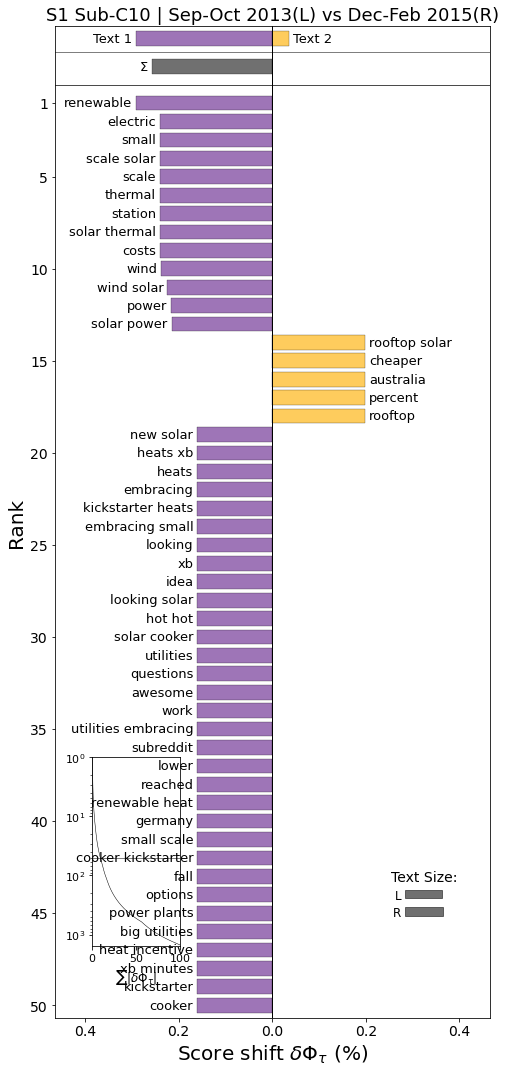


Fig.14 - Plotting Sample 2 Sub - Cluster 11 | Sep-Oct 2013(L) vs Dec-Feb 2015(R), Sample 2 size: 150000


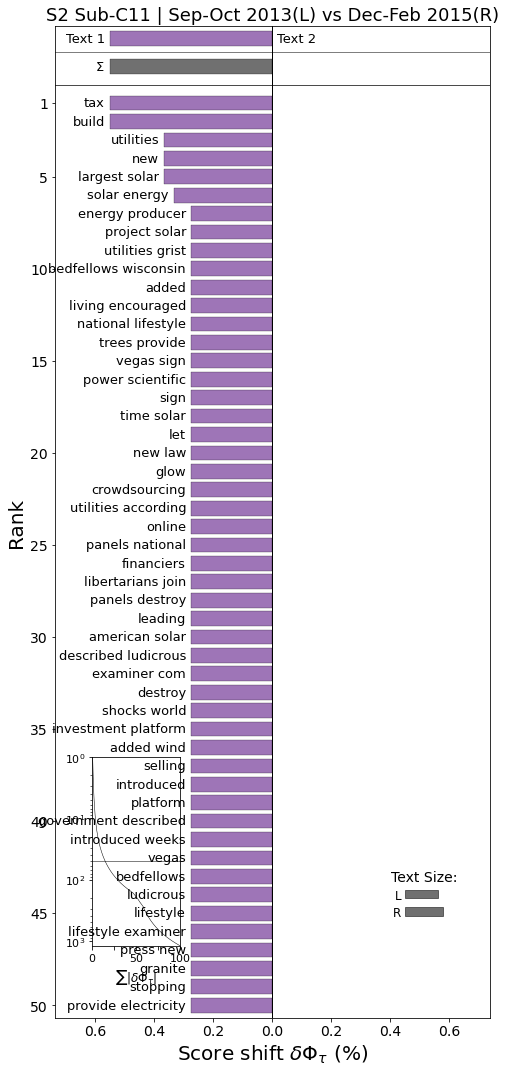


Fig.15 - Plotting Sample 1 Sub - Cluster 14 | Apr-Jun 2010(L) vs Dec-Feb 2011(R), Sample 1 size: 150000


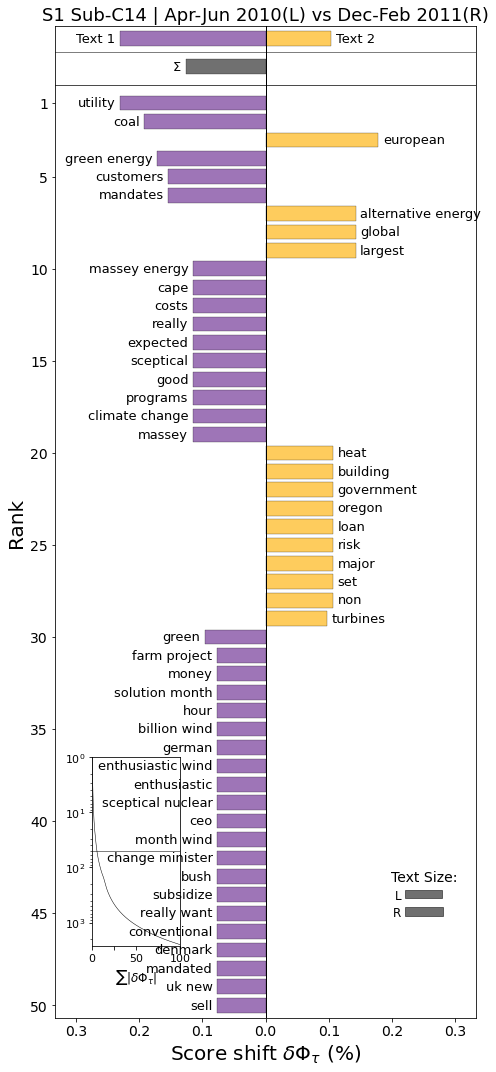


Fig.16 - Plotting Sample 2 Sub - Cluster 0 | Apr-Jun 2010(L) vs Dec-Feb 2011(R), Sample 2 size: 150000


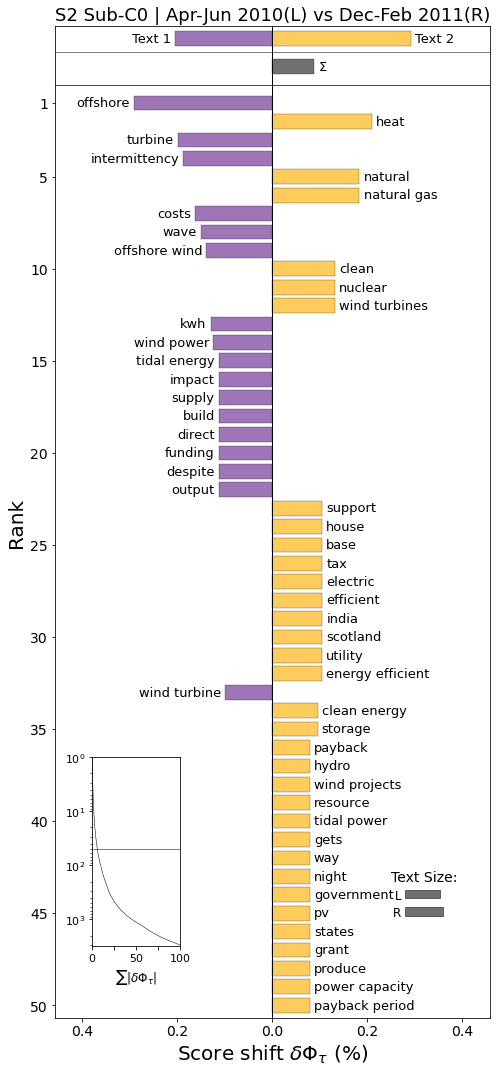


Fig.17 - Plotting Sample 1 Sub - Cluster 14 | May-Jul 2016(L) vs Sep-Jan 2018(R), Sample 1 size: 150000


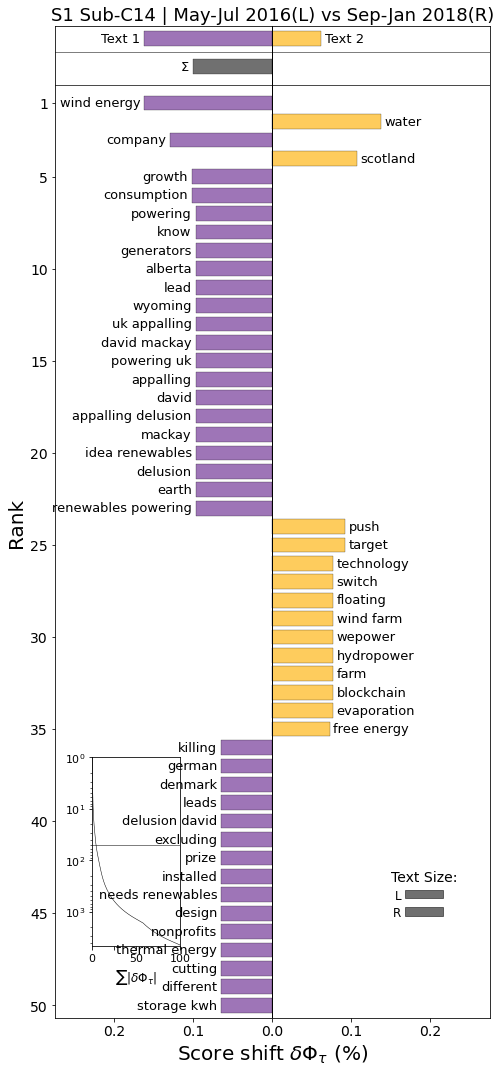


Fig.18 - Plotting Sample 2 Sub - Cluster 0 | May-Jul 2016(L) vs Sep-Jan 2018(R), Sample 2 size: 150000


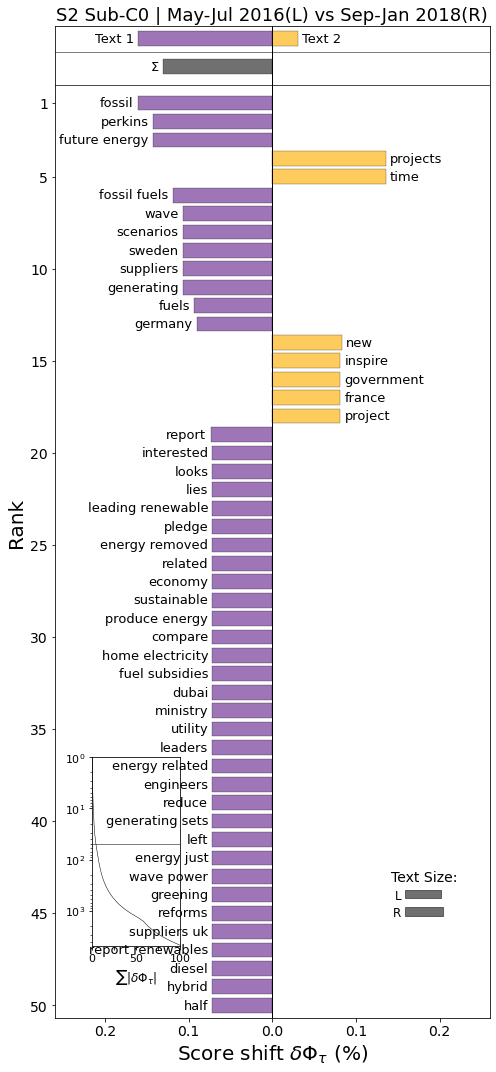


Fig.19 - Plotting Sample 1 Sub - Cluster 17 | Oct-Dec 2012(L) vs Aug-Oct 2013(R), Sample 1 size: 150000


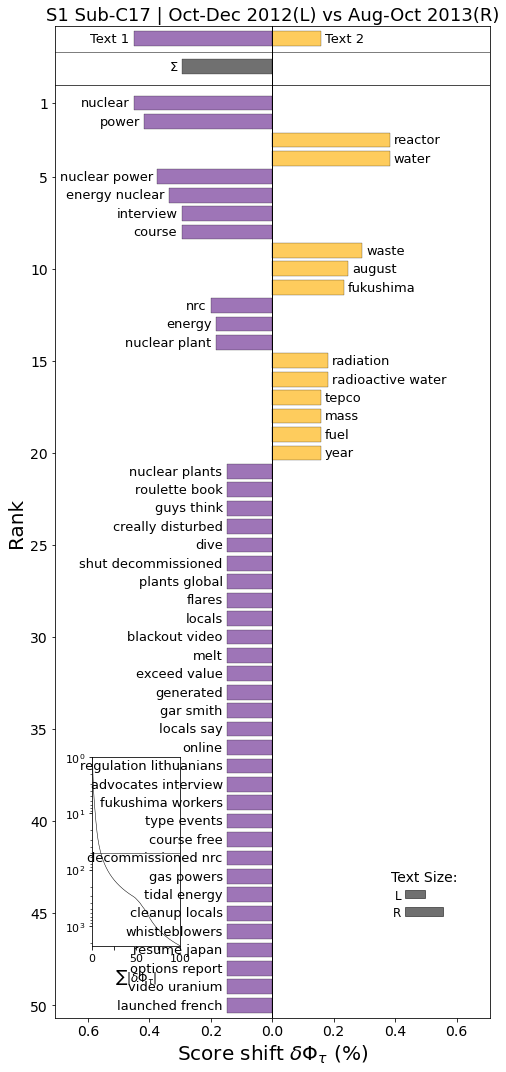


Fig.20 - Plotting Sample 2 Sub - Cluster 8 | Oct-Dec 2012(L) vs Aug-Oct 2013(R), Sample 2 size: 150000


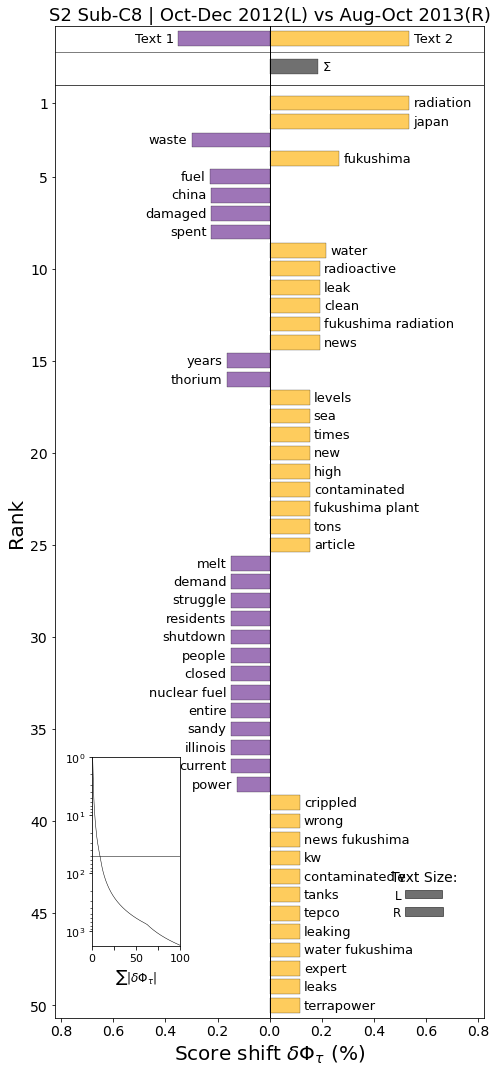


Fig.21 - Plotting Sample 1 Sub - Cluster 17 | Nov-Jan 2020(L) vs Oct-Dec 2020(R), Sample 1 size: 150000


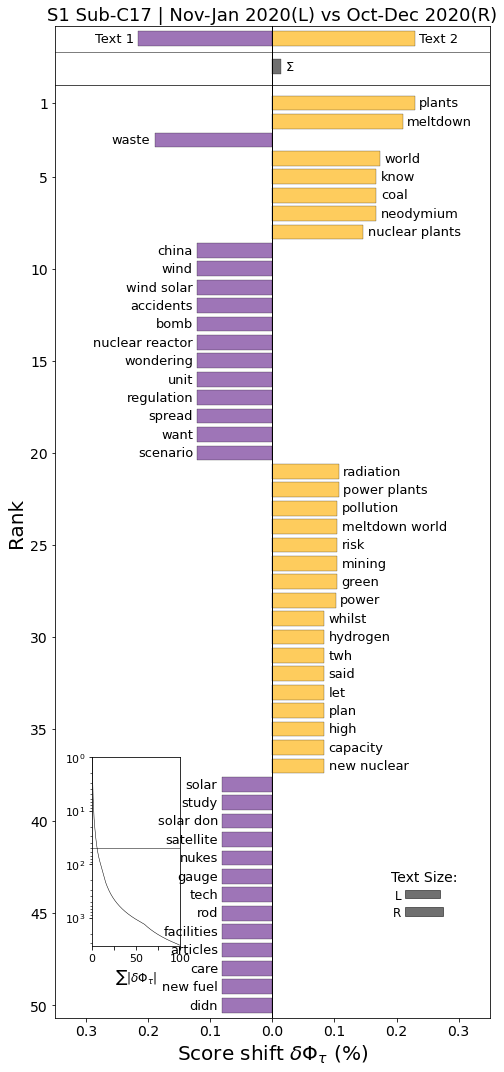


Fig.22 - Plotting Sample 2 Sub - Cluster 8 | Nov-Jan 2020(L) vs Oct-Dec 2020(R), Sample 2 size: 150000


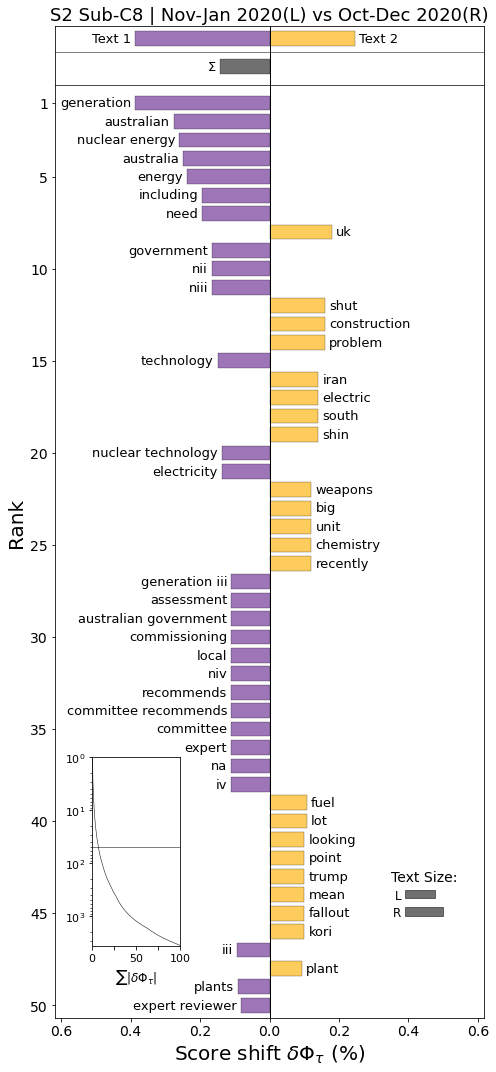

Wall time: 1min 44s


In [2]:
%%time

# Create a function to extract dictionary of words and TfidfVectorizer weights for text posts a given time period
def getWordFrequencies(dfSeries):
    
    cv = TfidfVectorizer(ngram_range=(1, 2), stop_words='english')
    newWords = ['amp','deleted','don','amp nbsp','don know']
    newSTOPWORDS = STOPWORDS.union(newWords)

    # Fit the cleaned data
    cvFit = cv.fit_transform([str(dfSeries.values.tolist())])

    # Obtain list of keywords and their respective Tfidf weights
    wordList = cv.get_feature_names()
    countList = cvFit.toarray().sum(axis=0)

    dictionary = dict(zip(wordList, countList))
    dictionary = dict(sorted(dictionary.items(), key=lambda x: x[1], reverse=True))
    
    # Remove the stopwords from the dictionary
    for word in newSTOPWORDS:
        if word in dictionary: del dictionary[word]
    
    return dictionary

    
# Create a function to generate WordShift Graphs for a given input
def createWordShiftGraphs(sampNo=1, clusterNo=1, p1Start="Jan 2011", p1End="Feb 2011", p2Start="May 2011", p2End="Jun 2011"):
    """
    
    The input variables used in the function are:
    sampNo:    [int] sample number, either 1 or 2 in this case
    clusterNo: [int] cluster number, ranging from 1 to 12
    p1Start:   [Mmm-YYYY] provide Start time of the first period for wordshift comparison
    p1End:     [Mmm-YYYY] provide End time of the first period for wordshift comparison
    p2Start:   [Mmm-YYYY] provide Start time of the second period for wordshift comparison
    p2End:     [Mmm-YYYY] provide End time of the second period for wordshift comparison    
    
    """
        
    # Load k-means labels
    sample = pd.read_csv(f"kmeansLabelsSample{sampNo}.csv")
    
    # Filter the preprocessed data for Sample
    temp = df.merge(sample, how='inner', left_on='id', right_on='ids')
    temp['date'] = pd.to_datetime(temp['date'])
    temp.set_index('date', inplace=True)
    
    createWordShiftGraphs.counter+=1
    print(f"\nFig.{createWordShiftGraphs.counter} - Plotting Sample {sampNo} Sub - Cluster {clusterNo} | {p1Start[:-5]}-{p1End}(L) vs {p2Start[:-5]}-{p2End}(R), Sample {sampNo} size: {len(temp)}")
    
    # Filter the dataframe based on time periods p1 and p2
    clusterdf1 = temp[(temp.labels == clusterNo) & (temp.index >= pd.to_datetime(p1Start)) & (temp.index <= pd.to_datetime(p1End))].copy()
    clusterdf2 = temp[(temp.labels == clusterNo) & (temp.index >= pd.to_datetime(p2Start)) & (temp.index <= pd.to_datetime(p2End))].copy()

    # Get the keywords and Tfidf weights dictionary for both p1 and p2
    dictionary1 = getWordFrequencies(clusterdf1["clean_text"])
    dictionary2 = getWordFrequencies(clusterdf2["clean_text"])
    
    # Use JSDivergence shifts to plot the WordShift Graphs and save the output on local disk
    JSD_shift = sh.JSDivergenceShift(type2freq_1=dictionary1,
                                type2freq_2=dictionary2,
                                base=2)
    JSD_shift.get_shift_graph(system_names = ['L', 'R'],
                                  title=f"S{sampNo} Sub-C{clusterNo} | {p1Start[:-5]}-{p1End}(L) vs {p2Start[:-5]}-{p2End}(R)",
                                  filename=f"./Plots/WordShiftGraphs/Sample{sampNo}/S{sampNo}Sub-C{clusterNo} {p1End}-{p2End}.png")

    
# create a counter to count the number of charts generated
createWordShiftGraphs.counter = 0


## Plot the WordShift graphs for various time periods   
    
# SUB CLUSTER 1 - EVs/Alternative energy resources

# Peak 1
createWordShiftGraphs(sampNo=1,clusterNo=0,p1Start="Apr 2008", p1End='May 2008', p2Start="Jun 2008", p2End="Aug 2008")
createWordShiftGraphs(sampNo=2,clusterNo=2,p1Start="Apr 2008", p1End='May 2008', p2Start="Jun 2008", p2End="Aug 2008")

# Peak 2
createWordShiftGraphs(sampNo=1,clusterNo=0,p1Start="Mar 2009", p1End='May 2009', p2Start="Apr 2010", p2End="Jun 2010")
createWordShiftGraphs(sampNo=2,clusterNo=2,p1Start="Mar 2009", p1End='May 2009', p2Start="Apr 2010", p2End="Jun 2010")

# Peak 3
createWordShiftGraphs(sampNo=1,clusterNo=0,p1Start="Dec 2016", p1End='Apr 2017', p2Start="Nov 2019", p2End="Feb 2020")
createWordShiftGraphs(sampNo=2,clusterNo=2,p1Start="Dec 2016", p1End='Apr 2017', p2Start="Nov 2019", p2End="Feb 2020")


# SUB CLUSTER 2 - Solar energy

# Peak 1
createWordShiftGraphs(sampNo=1,clusterNo=10,p1Start="Dec 2008", p1End='Feb 2009', p2Start="Jul 2009", p2End="Sep 2009")
createWordShiftGraphs(sampNo=2,clusterNo=11,p1Start="Dec 2008", p1End='Feb 2009', p2Start="Jul 2009", p2End="Sep 2009")

# Peak 2
createWordShiftGraphs(sampNo=1,clusterNo=10,p1Start="Apr 2010", p1End='Jun 2010', p2Start="Sep 2010", p2End="Nov 2010")
createWordShiftGraphs(sampNo=2,clusterNo=11,p1Start="Apr 2010", p1End='Jun 2010', p2Start="Sep 2010", p2End="Nov 2010")

# Peak 3
createWordShiftGraphs(sampNo=1,clusterNo=10,p1Start="Feb 2011", p1End='Apr 2011', p2Start="Nov 2011", p2End="Jan 2012")
createWordShiftGraphs(sampNo=2,clusterNo=11,p1Start="Feb 2011", p1End='Apr 2011', p2Start="Nov 2011", p2End="Jan 2012")

# Peak 4
createWordShiftGraphs(sampNo=1,clusterNo=10,p1Start="Sep 2013", p1End='Oct 2013', p2Start="Dec 2014", p2End="Feb 2015")
createWordShiftGraphs(sampNo=2,clusterNo=11,p1Start="Sep 2013", p1End='Oct 2013', p2Start="Dec 2014", p2End="Feb 2015")



# SUB CLUSTER 3 - Renewable energy excl. Solar

# Peak 1
createWordShiftGraphs(sampNo=1,clusterNo=14,p1Start="Apr 2010", p1End='Jun 2010', p2Start="Dec 2010", p2End="Feb 2011")
createWordShiftGraphs(sampNo=2,clusterNo=0,p1Start="Apr 2010", p1End='Jun 2010', p2Start="Dec 2010", p2End="Feb 2011")

# Peak 2
createWordShiftGraphs(sampNo=1,clusterNo=14,p1Start="May 2016", p1End='Jul 2016', p2Start="Sep 2017", p2End="Jan 2018")
createWordShiftGraphs(sampNo=2,clusterNo=0,p1Start="May 2016", p1End='Jul 2016', p2Start="Sep 2017", p2End="Jan 2018")


# SUB CLUSTER 4 - Nuclear energy

# Peak 2
createWordShiftGraphs(sampNo=1,clusterNo=17,p1Start="Oct 2012", p1End='Dec 2012', p2Start="Aug 2013", p2End="Oct 2013")
createWordShiftGraphs(sampNo=2,clusterNo=8,p1Start="Oct 2012", p1End='Dec 2012', p2Start="Aug 2013", p2End="Oct 2013")

# Peak 2
createWordShiftGraphs(sampNo=1,clusterNo=17,p1Start="Nov 2019", p1End='Jan 2020', p2Start="Oct 2020", p2End="Dec 2020")
createWordShiftGraphs(sampNo=2,clusterNo=8,p1Start="Nov 2019", p1End='Jan 2020', p2Start="Oct 2020", p2End="Dec 2020")


